In [5]:
import numpy as np 
import pandas as pd # for working with dataframes
from scipy import stats
import seaborn as sns # for data visualization 
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_validate

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings # http://blog.johnmuellerbooks.com/2015/11/30/warnings-in-python-and-anaconda/
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('SurveyGermanUniversityFinal_new.csv')

In [7]:
df.describe()

,GDP,economy,part_time,GenderManual,AgeManual,HEQ_Auto,MStatus_Manual,PES_Manual,Media_Auto,InfoPortal_Auto,...,PSearchEngine_Auto,Strong_GHE_Auto,university1,pay_study1,GDP1,living_cost1,economy1,part_time1,scholarships1,PlanToJoin
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,...,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,3.592593,3.611111,3.783951,1.419753,2.290123,8.814815,1.117284,2.882716,19.962963,23.654321,...,7.302469,15.679012,1.191358,2.660494,3.592593,2.456790,3.629630,3.783951,1.104938,0.598765
std,0.830741,0.966842,1.031908,0.495049,0.575721,6.142432,0.407778,0.750865,11.123189,12.464768,...,2.469917,20.335892,0.394590,0.972693,0.830741,1.211225,0.938407,1.031908,0.307424,0.491668
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
25%,3.000000,3.000000,3.000000,1.000000,2.000000,5.000000,1.000000,3.000000,16.000000,11.250000,...,6.000000,1.000000,1.000000,2.000000,3.000000,1.000000,3.000000,3.000000,1.000000,0.000000
50%,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,1.000000,3.000000,17.000000,21.500000,...,6.000000,1.000000,1.000000,3.000000,4.000000,3.000000,4.000000,4.000000,1.000000,1.000000
75%,4.000000,4.000000,5.000000,2.000000,3.000000,13.750000,1.000000,3.000000,23.000000,37.000000,...,10.000000,29.750000,1.000000,3.000000,4.000000,3.000000,4.000000,5.000000,1.000000,1.000000
max,5.000000,5.000000,5.000000,2.000000,4.000000,25.000000,2.000000,4.000000,52.000000,45.000000,...,15.000000,62.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,2.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              162 non-null    object
 1   Age                 162 non-null    object
 2   HEQ                 162 non-null    object
 3   Mstatus             162 non-null    object
 4   PES                 162 non-null    object
 5   Media               162 non-null    object
 6   InfoPortal          162 non-null    object
 7   PBrowser            162 non-null    object
 8   PEngine             162 non-null    object
 9   Strong_GHE          161 non-null    object
 10  university          160 non-null    object
 11  pay_study           160 non-null    object
 12  GDP                 162 non-null    int64 
 13  living_cost         162 non-null    object
 14  economy             162 non-null    int64 
 15  part_time           162 non-null    int64 
 16  scholarships        162 no

Text(0.5, 1.0, 'Plan To Join Distribution')

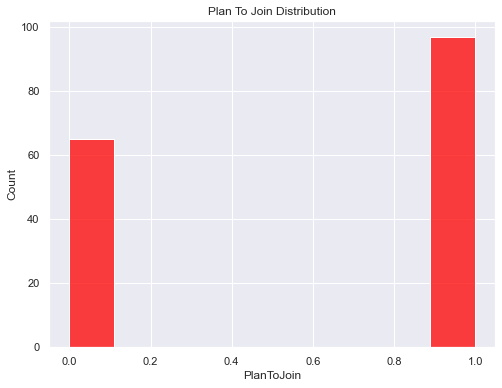

In [9]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.histplot(df['PlanToJoin'],color="red").set_title('Plan To Join Distribution')

In [15]:
unused_col = ['Gender','Age','HEQ','Mstatus','InfoPortal','PBrowser','PEngine','Strong_GHE','university','pay_study','GDP','living_cost', 'InfoPortal_Auto', 'PBrowser_Auto','economy','part_time','scholarships','PES_Manual','Media_Auto','PSearchEngine_Auto','Strong_GHE_Auto','Media','PES']
df1 = df.drop(columns=unused_col).reset_index(drop=True)
df1.tail()

,GenderManual,AgeManual,HEQ_Auto,MStatus_Manual,university1,pay_study1,GDP1,living_cost1,economy1,part_time1,scholarships1,PlanToJoin
157,1,2,5,1,1,3,3,1,3,3,1,1
158,1,2,5,1,1,4,4,1,4,4,1,1
159,1,2,8,1,1,2,4,2,3,4,1,0
160,2,2,9,1,1,1,4,1,3,5,1,1
161,2,1,9,1,1,2,5,2,5,5,1,1


In [16]:
pd.isnull(df1).sum()

GenderManual      0
AgeManual         0
HEQ_Auto          0
MStatus_Manual    0
university1       0
pay_study1        0
GDP1              0
living_cost1      0
economy1          0
part_time1        0
scholarships1     0
PlanToJoin        0
dtype: int64

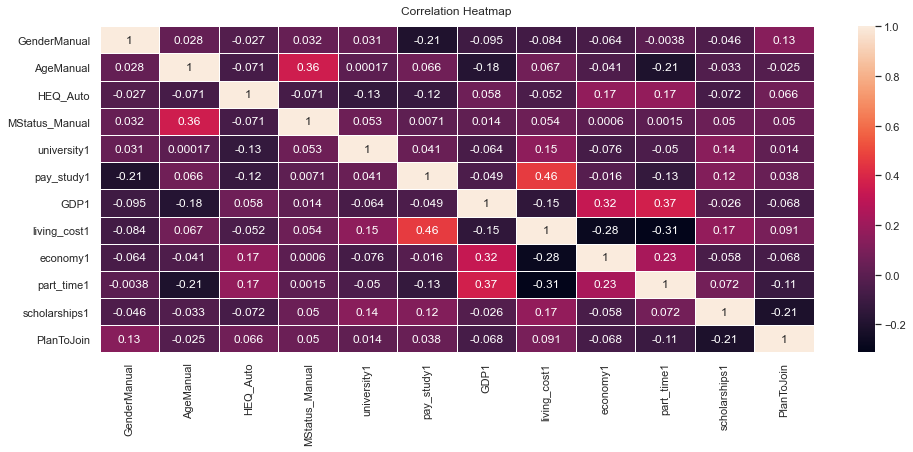

In [45]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(),annot=True,lw=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Text(0.5, 1.0, 'Plans to join Based on Gender')

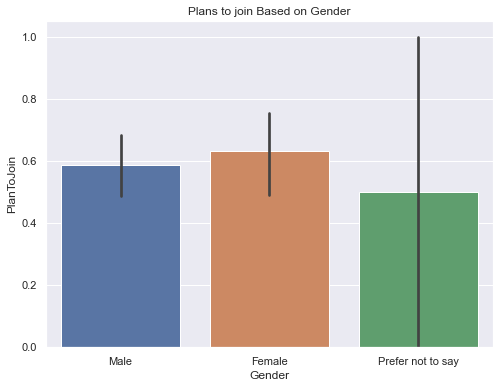

In [18]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.barplot(x = 'Gender', y = 'PlanToJoin', data = df)
plt.title('Plans to join Based on Gender')

Text(0.5, 1.0, 'Plans to join Based on Age')

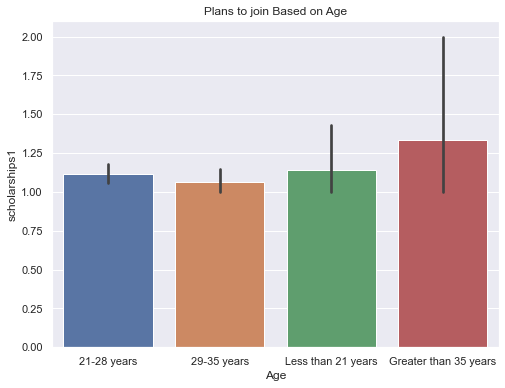

In [20]:
sns.barplot(x = 'Age', y = 'scholarships1', data = df)
plt.title('Plans to join Based on Age')

Text(0.5, 1.0, 'Impact of part time job Based on different Age and Gender')

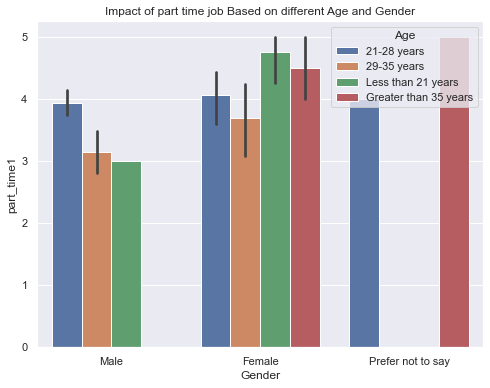

In [21]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.barplot(x = 'Gender', y = 'part_time1', hue = 'Age', data = df)
plt.title('Impact of part time job Based on different Age and Gender')

Text(0.5, 1.0, 'Impact of living cost on marital status')

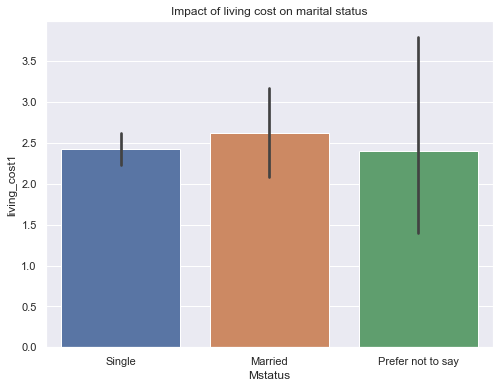

In [24]:
sns.barplot(x = 'Mstatus', y = 'living_cost1', data = df)
plt.title('Impact of living cost on marital status')

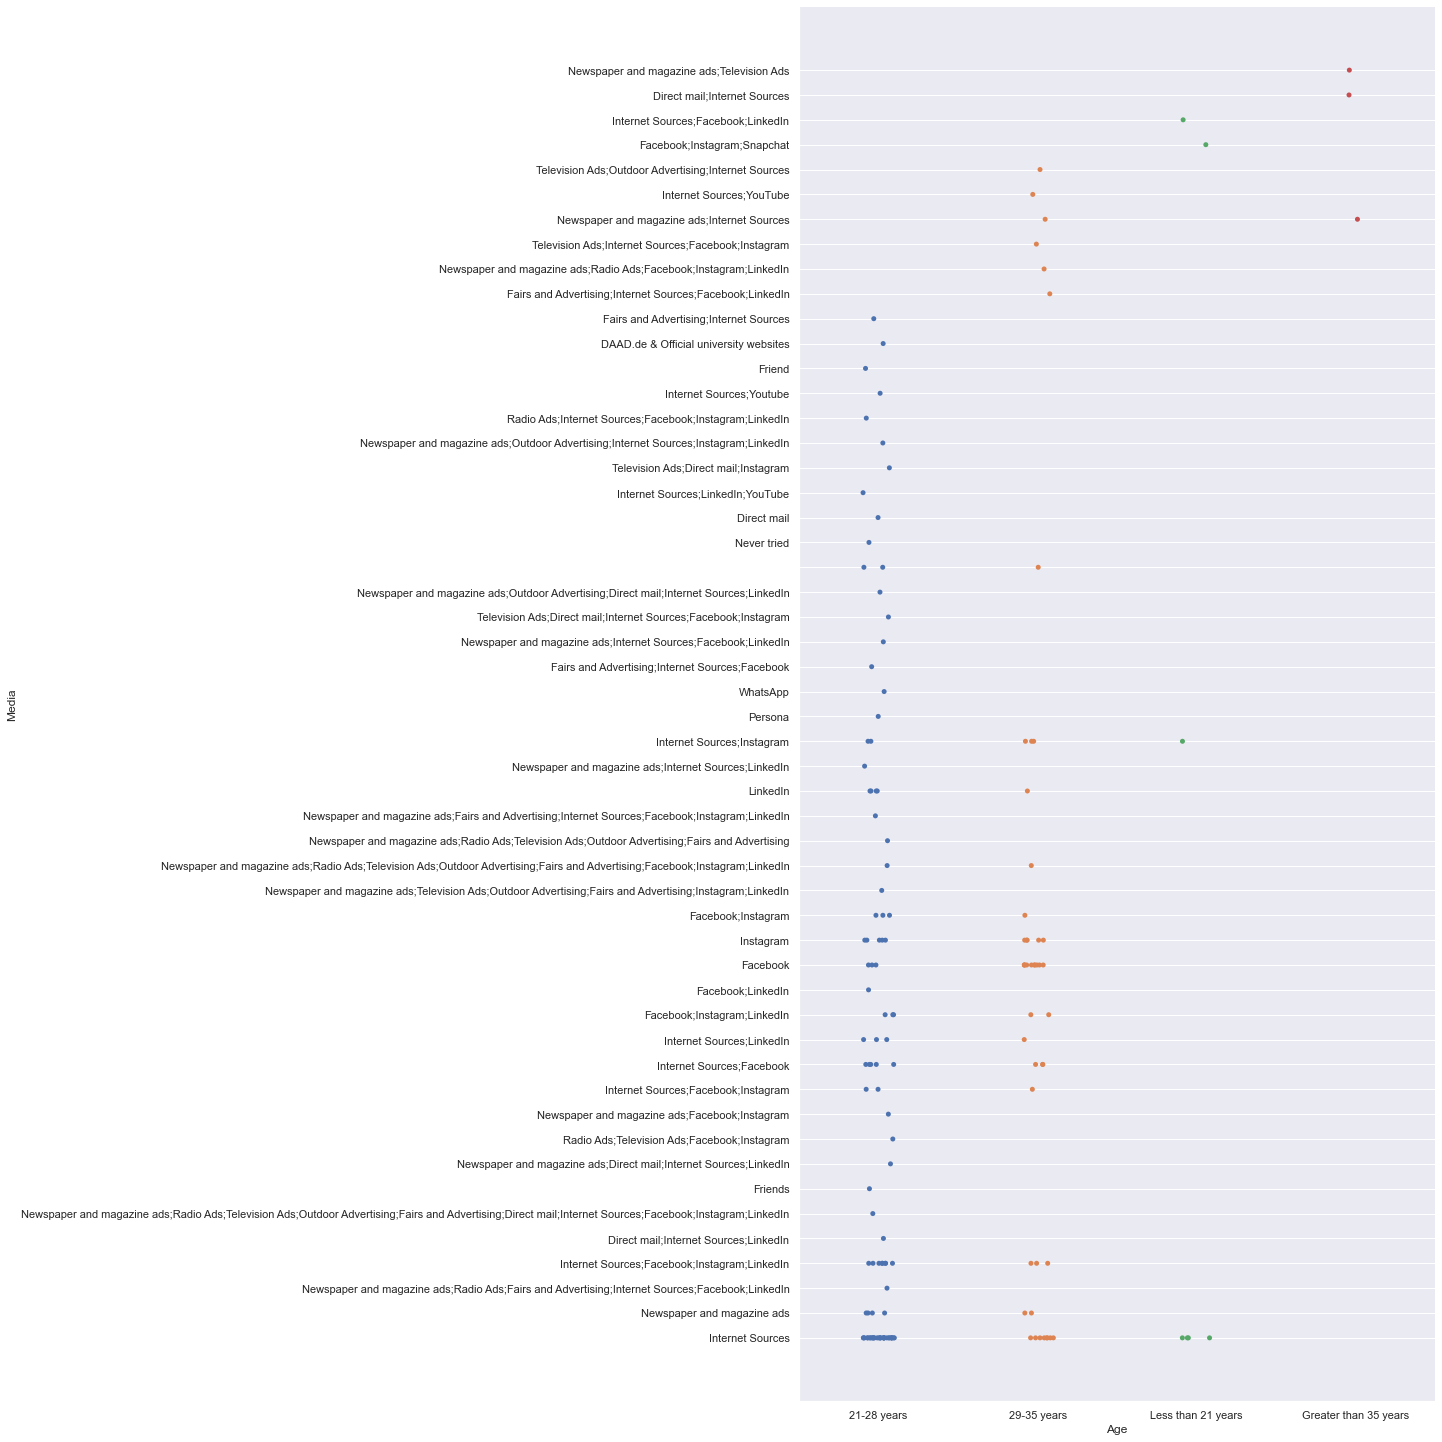

In [42]:
sns.catplot(x = 'Age', y = 'Media', data = df, height=20)

Text(0.5, 1.0, 'Plan to join based on overall economy')

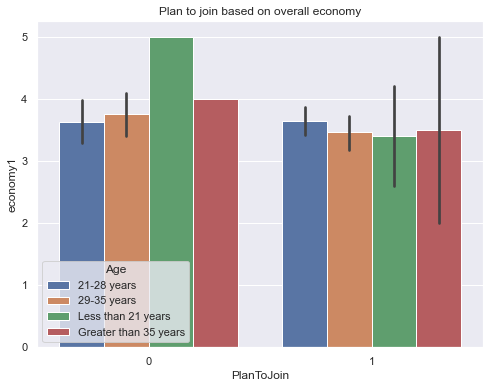

In [44]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.barplot(x = 'PlanToJoin', y = 'economy1', hue = 'Age', data = df)
plt.title('Plan to join based on overall economy')